In [1]:
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
from keras.datasets import mnist

In [2]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

2022-08-08 16:19:01.133289: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# This model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [4]:
# This is our encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [6]:
# # This model shows encoded images
# # encoder = Model(input_img, encoded)
# # Creating a decoder model
# encoded_input = Input(shape=(encoding_dim,))
# # last layer of the autoencoder model
# decoder_layer = autoencoder.layers[-1]
# # decoder model
# decoder = Model(encoded_input, decoder_layer(encoded_input)) 

In [7]:
(x_train, _), (x_test, _) = mnist.load_data()

In [8]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [9]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 2s 8ms/step - loss: 0.2764 - val_loss: 0.1867
Epoch 2/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1674 - val_loss: 0.1502
Epoch 3/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1418 - val_loss: 0.1320
Epoch 4/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1271 - val_loss: 0.1199
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1168 - val_loss: 0.1111
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1093 - val_loss: 0.1050
Epoch 7/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1042 - val_loss: 0.1009
Epoch 8/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1007 - val_loss: 0.0981
Epoch 9/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0984 - val_loss: 0.0964
Epoch 10/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0969 - val_loss: 0.0951

2022-08-08 16:19:05.624586: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-08-08 16:19:05.625125: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2100000000 Hz


In [10]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [13]:
# autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# autoencoder.fit(x_train, x_train,
#                 epochs=15,
#                 batch_size=256,
#                 validation_data=(x_test, x_test))
# encoded_img = encoder.predict(x_test)
# decoded_img = decoder.predict(encoded_img) 

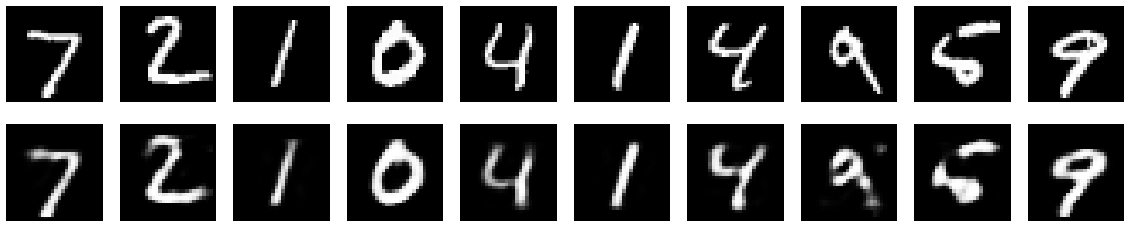

In [12]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()